# 第九章数据转换

在 PyTorch 中，数据转换（Data Transformation） 是一种在加载数据时对数据进行处理的机制，将原始数据转换成适合模型训练的格式，主要通过 torchvision.transforms 提供的工具完成。

数据转换不仅可以实现基本的数据预处理（如归一化、大小调整等），还能帮助进行数据增强（如随机裁剪、翻转等），提高模型的泛化能力。

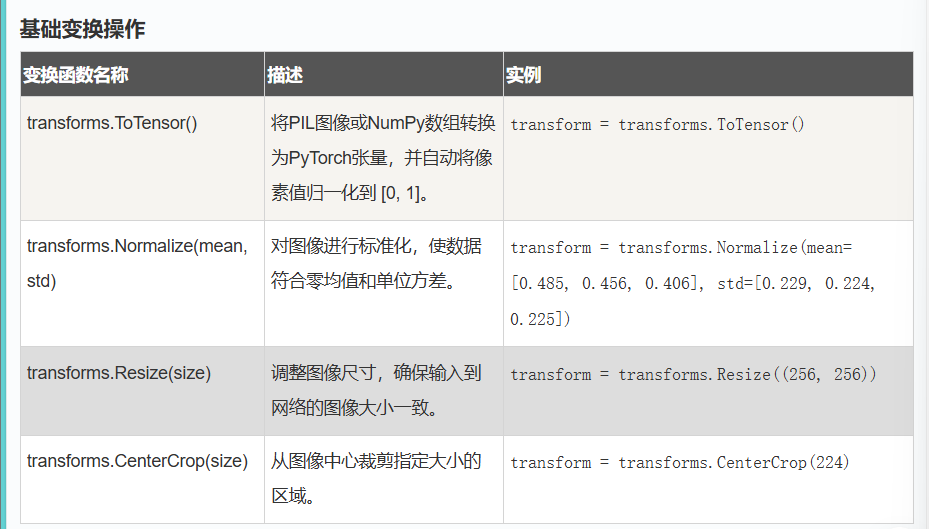

In [200]:
from torchvision import transforms
from PIL import Image
image=Image.open('image.jpg')


transform=transforms.ToTensor()
image_transform=transform(image)
image_transform

numpy_arr=np.array(image)
print(numpy_arr)
tensor_from_np=transform(Image.fromarray(numpy_arr))
print(tensor_from_np)

[[[245 214 193]
  [245 215 191]
  [245 215 189]
  ...
  [234 236 235]
  [234 236 235]
  [233 235 234]]

 [[245 214 193]
  [245 215 191]
  [245 215 189]
  ...
  [234 236 235]
  [234 236 235]
  [233 235 234]]

 [[245 214 193]
  [245 215 191]
  [245 215 189]
  ...
  [234 236 235]
  [234 236 235]
  [233 235 234]]

 ...

 [[ 56  63  81]
  [ 56  63  81]
  [ 56  63  81]
  ...
  [242 244 239]
  [242 244 239]
  [242 244 239]]

 [[ 56  63  81]
  [ 56  63  81]
  [ 56  63  81]
  ...
  [242 244 239]
  [242 244 239]
  [242 244 239]]

 [[ 56  63  81]
  [ 56  63  81]
  [ 56  63  81]
  ...
  [242 244 239]
  [242 244 239]
  [242 244 239]]]
tensor([[[0.9608, 0.9608, 0.9608,  ..., 0.9176, 0.9176, 0.9137],
         [0.9608, 0.9608, 0.9608,  ..., 0.9176, 0.9176, 0.9137],
         [0.9608, 0.9608, 0.9608,  ..., 0.9176, 0.9176, 0.9137],
         ...,
         [0.2196, 0.2196, 0.2196,  ..., 0.9490, 0.9490, 0.9490],
         [0.2196, 0.2196, 0.2196,  ..., 0.9490, 0.9490, 0.9490],
         [0.2196, 0.2196, 0.219

In [201]:
transform=transforms.Normalize(mean=[0.5],std=[0.5])
'''对数据进行标准化，使其符合特定的均值和标准差。

通常用于图像数据，将其像素值归一化为零均值和单位方差。'''

In [202]:
transform = transforms.Resize((128, 128))  # 将图像调整为 128x128

In [209]:
transform = transforms.CenterCrop(128)  # 裁剪 128x128 的区域
image_transform=transform(image)
print(image_transform)
print(image)

<PIL.Image.Image image mode=RGB size=128x128 at 0x22CC4985FD0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=704x671 at 0x22CC4B77B20>


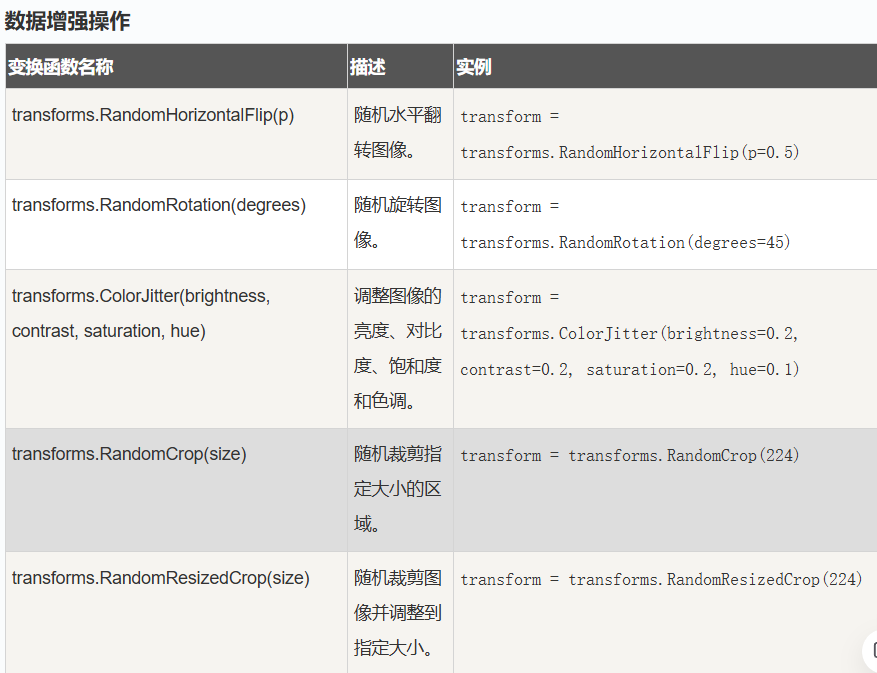

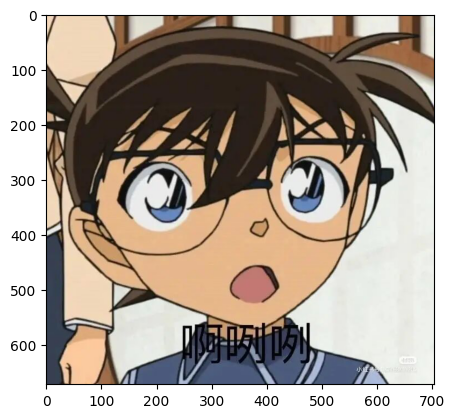

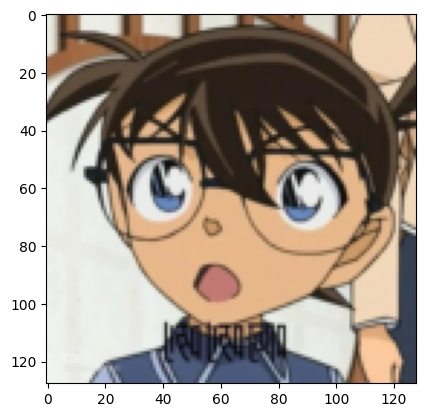

In [220]:
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# 加载图像
image = Image.open('image.jpg')

# 定义数据增强变换
# transform = transforms.RandomHorizontalFlip(p=0.8)
# transform = transforms.RandomRotation(degrees=30)  # 随机旋转 -30 到 +30 度
# transform=transforms.ColorJitter(brightness=0.2,contrast=0.2,saturation=0.8,hue=0.1)#亮度对比度饱和度和色调
# 应用变换
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(p=0.5),
    # transforms.ToTensor(),
    # transforms.Normalize(mean=[0.5], std=[0.5])
])
transformed_image = transform(image)

# 显示原图和变换后的图像
plt.imshow(image)
plt.show()
plt.imshow(transformed_image)
plt.show()


自定义转换
如果 transforms 提供的功能无法满足需求，可以通过自定义类或函数实现。

In [221]:
class CustomTransform:
    def __call__(self, x):
        # 这里可以自定义任何变换逻辑
        return x * 2

transform = CustomTransform()